In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
my_path_1 = '/Users/kpierce/SEIR_Example/outputs/scenario_1/'
my_path_2 = '/Users/kpierce/SEIR_Example/outputs/scenario_2/'
my_path_3 = '/Users/kpierce/SEIR_Example/outputs/scenario_3/'

def ingest_data(base_path, scenario_name):
    scenario1 = [i for i in os.listdir(base_path) if 'results' in i]
    all_results = []
    for s1 in scenario1:
        df = pd.read_csv(os.path.join(base_path, s1))
        all_results.append(df)
    all_results_df = pd.DataFrame(pd.concat(all_results))
    # fix a whitespace problem in the headers
    all_results_df.columns = ['sim_index', 'time', 'susceptible', 'exposed', 'infected', 'recovered']
    all_results_df['scenario_name'] = scenario_name 
    return all_results_df

In [3]:
s1_results = ingest_data(my_path_1, 'scenario 1')
s2_results = ingest_data(my_path_2, 'scenario 2')
s3_results = ingest_data(my_path_3, 'scenario 3')

In [4]:
all_scenario_results = pd.concat([s1_results, s2_results, s3_results])

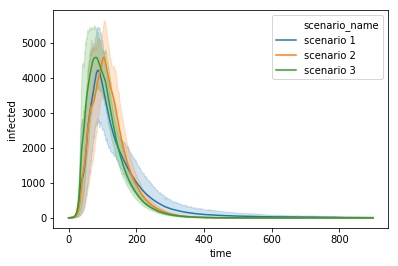

In [5]:
ax = sns.lineplot(
    x=all_scenario_results["time"],
    y=all_scenario_results["infected"],
    hue=all_scenario_results["scenario_name"],
    data=all_scenario_results
)